In [1]:
import numpy as np
from obspy import read, read_inventory
from obspy.core import UTCDateTime
from obspy.core.stream import Stream

In [7]:
min_filtering_frequency = 0.1
max_filtering_frequency = 30

root_folder = "data"
# root_folder = "E:\\UDINA_2018\\miniSEED"
ud01_data_folder_path = root_folder+"/UD01"
ud02_data_folder_path = root_folder+"/UD02"
ud03_data_folder_path = root_folder+"/UD03"
ud04_data_folder_path = root_folder+"/UD04"

# directions_data_folders = ["6d97e2", "6d97n2", "6d97z2"]
directions_data_folders = ["6d97e2", "6d97n2"]

In [8]:
def process_station_data(station_data_folder):
    import os 
    station_data = Stream()
    for direction in directions_data_folders:
        data_folder = station_data_folder+"/"+direction
        for filename in os.listdir(data_folder):
            station_data+=read(data_folder+""+filename)
            
    return station_data

In [9]:
first_station_data = process_station_data(ud01_data_folder_path)
# first_station_data += process_station_data(ud02_data_folder_path)
# first_station_data += process_station_data(ud03_data_folder_path)
# first_station_data += process_station_data(ud04_data_folder_path)


1. слепить всё в кучу
2. получим объект Stream, его len будет равен количеству трасс
3. находим максимальное количество элементов в трассе
4. запускаем цикл от 0 до этого количества
5. каждому времени в tr.times() соответствует один элемент в tr.data
6. создаём list в котором будут tuple's вида ( <время>, <количество трасс> )
7. перебираем tr.data[i], если там не None (скорее всего будет None, если данных нет, нужно проверить), то увеличиваем счётчик 
    количества трасс
8. перебрав все трассы сохраняем в list нужный tuple. 
9. берём следующий индекс

In [19]:
class CustomStream(Stream):
    def __init__(self, stream):
        self.traces_stats = list()
        self.stream = stream

In [56]:
max = 0
for i in range(len(first_station_data)):
    trace = first_station_data[i]
    length = len(trace)
    if length > max:
        max = length
print(max)

360000


In [ ]:
stats_list = list()
times = first_station_data[0].times()
number_of_traces = len(first_station_data)
for time in times:
    number_of_active_traces = 0
    index = np.where(times==time)[0][0]
    for i in range(number_of_traces):
        trace = first_station_data[i]
        if trace.data[index] != None:
            number_of_active_traces+=1
    stats_list.append((time, number_of_active_traces))

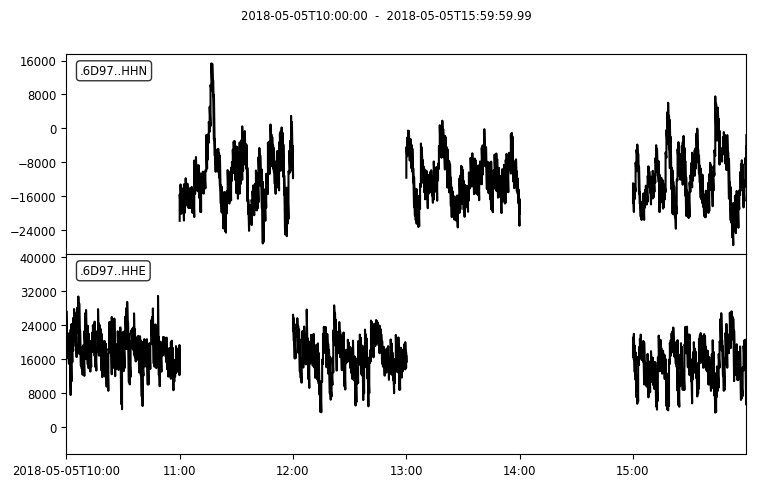

In [11]:
first_station_data.plot()

In [13]:
first_station_data

6 Trace(s) in Stream:
.6D97..HHE | 2018-05-05T10:00:00.000000Z - 2018-05-05T10:59:59.990000Z | 100.0 Hz, 360000 samples
.6D97..HHE | 2018-05-05T12:00:00.000000Z - 2018-05-05T12:59:59.990000Z | 100.0 Hz, 360000 samples
.6D97..HHE | 2018-05-05T15:00:00.000000Z - 2018-05-05T15:59:59.990000Z | 100.0 Hz, 360000 samples
.6D97..HHN | 2018-05-05T13:00:00.000000Z - 2018-05-05T13:59:59.990000Z | 100.0 Hz, 360000 samples
.6D97..HHN | 2018-05-05T15:00:00.000000Z - 2018-05-05T15:59:59.990000Z | 100.0 Hz, 360000 samples
.6D97..HHN | 2018-05-05T11:00:00.000000Z - 2018-05-05T11:59:59.990000Z | 100.0 Hz, 360000 samples

In [14]:
first_station_data.merge()

2 Trace(s) in Stream:
.6D97..HHE | 2018-05-05T10:00:00.000000Z - 2018-05-05T15:59:59.990000Z | 100.0 Hz, 2160000 samples (masked)
.6D97..HHN | 2018-05-05T11:00:00.000000Z - 2018-05-05T15:59:59.990000Z | 100.0 Hz, 1800000 samples (masked)

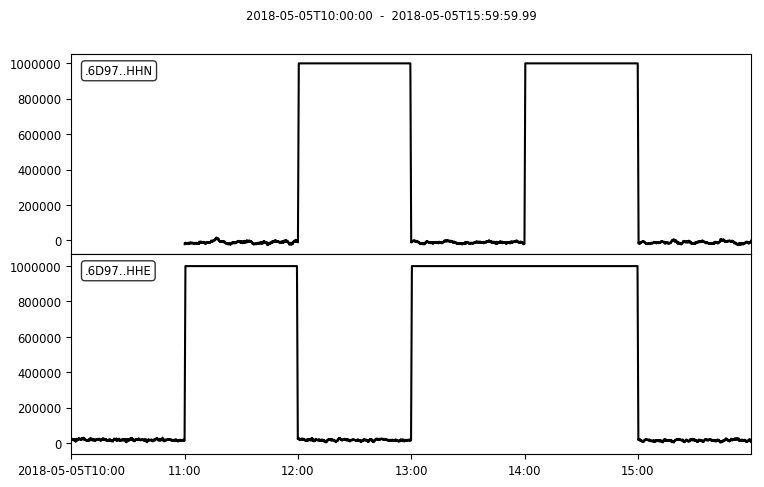

In [15]:
first_station_data.plot()

In [18]:
first_station_data[0].data.max()

30902

In [35]:
times = first_station_data[0].times('utcdatetime')

In [36]:
times

masked_array(data=[UTCDateTime(2018, 5, 5, 10, 0),
                   UTCDateTime(2018, 5, 5, 10, 0, 0, 10000),
                   UTCDateTime(2018, 5, 5, 10, 0, 0, 20000), ...,
                   UTCDateTime(2018, 5, 5, 15, 59, 59, 970000),
                   UTCDateTime(2018, 5, 5, 15, 59, 59, 980000),
                   UTCDateTime(2018, 5, 5, 15, 59, 59, 990000)],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object)

In [41]:
index = np.where(times==UTCDateTime(2018, 5, 5, 12, 30, 0))

In [42]:
index

(array([900000], dtype=int32),)

In [43]:
first_station_data[0].data[900000]

17101

1. вырезать куски данных, где происходили события. например, из суток возникает 3 файла. это будет триггер. 
2. матрица данных, вектор времён, какая трасса какой компоненте и какой станции соответствует, массив количества живых трасс - сделать свой класс. 

1. эти триггеры отдавать Елизавете
2. (Л)подобрать параметры для автоматического триггирования
3. далее пытаемся применить машинное обучение с полученным параметром триггирования

1. считываю все данные
2. все data из каждой трассы сохранить в матрицу
3. получится огромная матрица данных
4. None заменять нулями
5. добавить временной ряд
6. добавить количество живых трасс
7. в объекте так же сохраняем время начало отсчёта, время конца отсчёта

1. (Л) выяснить название триггер-файла
2. (Л) выяснить длину промежутка

1. UDINA_год_месяц_день_час_минута_секунда